# Module 2--Downloading data


- Module 1 covers python basics
    - Notes (Current page)
    - Youtube video

# 1. Importing Data
- All data and code for this course including this notebook is viewable on our course page below
    - https://github.com/Data-Science-Public-Policy/graspp_2025_spring/tree/main

## 1.1. Importing data from github

1. Find a cool data set and click right click and copy link from the raw button


<img src="screenshots/github_import_raw.png" />



In [1]:
# THE URL SHOULD HAVE THE /raw/ somewhere
url = "https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv"
# This line prints the url
url

'https://github.com/Data-Science-Public-Policy/graspp_2025_spring/raw/refs/heads/module_1/data/examples/module_1/world_bank_data.csv'

### 1.1.1 Importing example data from our class

In [2]:
# This line uses the pandas library's 'read_csv' function.
import pandas as pd
df = pd.read_csv(url)
# The 'head(2)' returns the first 2 rows of the DataFrame.
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


## 1.2 Importing directly from wikipedia

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_cities'
df = pd.read_html(url)
df[1].head(2)

City[a] Country UN 2018 population estimates[b]         City proper[c]  \
  City[a] Country UN 2018 population estimates[b]             Definition   
0   Tokyo   Japan                        37468000  Metropolis prefecture   
1   Delhi   India                        28514000  Municipal corporation   

                                       Urban area[12]             \
  Population Area (km2) Density (/km2)     Population Area (km2)   
0   13515271       2191     6,169 [13]       37785000       8231   
1   16753235       1484    11,289 [15]       32226000       2344   

                 Metropolitan area[d]                            
  Density (/km2)           Population Area (km2) Density (/km2)  
0      4,591 [e]             37274000      13452     2,771 [14]  
1     13,748 [f]             29000000       3483     8,326 [16]

In [4]:
url = 'https://en.wikipedia.org/wiki/2024_Japanese_general_election'
tables = pd.read_html(url)
df = tables[6]
df

Parties                                                      Leader  \
  Parties                                 Parties.1            Leader   
0     NaN                  Liberal Democratic Party    Shigeru Ishiba   
1     NaN  Constitutional Democratic Party of Japan    Yoshihiko Noda   
2     NaN                    Japan Innovation Party     Nobuyuki Baba   
3     NaN                                   Komeito     Keiichi Ishii   
4     NaN                  Japanese Communist Party     Tomoko Tamura   
5     NaN           Democratic Party For the People   Yuichiro Tamaki   
6     NaN                         Reiwa Shinsengumi     Tarō Yamamoto   
7     NaN                   Social Democratic Party  Mizuho Fukushima   
8     NaN                                  Sanseitō      Sohei Kamiya   
9     NaN                    Nonpartisan and others                 —   

                                  Ideology         Seats                     \
                                  Ideology Last election At dissolution[15]   
0        Conservatism Japanese nationalism     259 / 465          247 / 465   
1                               Liberalism      96 / 465           98 / 465   
2  Right-wing populism Economic liberalism      41 / 465           44 / 465   
3                       Buddhist democracy      32 / 465           32 / 465   
4                                Communism      10 / 465           10 / 465   
5                             Conservatism      11 / 465            7 / 465   
6         Progressivism Left-wing populism       3 / 465            3 / 465   
7                         Social democracy       1 / 465            1 / 465   
8   Right-wing populism  Ultraconservatism       0 / 465            1 / 465   
9                                        —      12 / 465           22 / 465   

                Status  
                Status  
0  Governing coalition  
1           Opposition  
2           Opposition  
3  Governing coalition  
4           Opposition  
5           Opposition  
6           Opposition  
7           Opposition  
8           Opposition  
9           Opposition

## 1.3 Importing data from your local computer workspace

In [5]:
df = pd.read_csv("../../../data/examples/module_1/world_bank_data.csv")
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


## 1.4 Import data from Global Macro Database (import from Github)

- This is an amazing resource with macrodata from many different sources
    - https://github.com/KMueller-Lab/Global-Macro-Database/tree/main 

In [6]:
url = 'https://github.com/KMueller-Lab/Global-Macro-Database/raw/refs/heads/main/data/final/chainlinked_infl.dta'
df = pd.read_stata(url)
df.head(2)

,ISO3,year,ADB_infl,AHSTAT_infl,AMF_infl,BCEAO_infl,BIS_infl,BORDO_infl,CEPAC_infl,EUS_infl,...,OECD_KEI_infl,WB_CC_infl,WDI_infl,WDI_ARC_infl,CS1_infl,CS2_infl,infl,chainlinking_ratio,source,source_change
0,ZWE,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.131044,1.0,IMF_WEO,NaN
1,ZWE,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.108963,1.0,IMF_WEO,NaN


# 2. Download from API

## 2.1 World bank

#### NO API REQUIRED

In [7]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df  # Return the table

In [8]:
# Example 1
data = download_worldbank(
    indicator = 'NY.GDP.PCAP.CD' , 
    countries = ['US', 'CA', 'MX', 'JP'],  
    date_start = '2021', 
    date_end = '2023'
)
data.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,GDP per capita (current US$),Canada,CAN,2023,53431.185706,NaN,NaN,1
1,GDP per capita (current US$),Canada,CAN,2022,55509.393176,NaN,NaN,1


## 2.2 FRED
### 2.2.A Register for FRED and click on API Keys

<img src="screenshots/fred_api.png" />


### 2.2.1 Import data

In [9]:
import numpy as np
import requests
import json

def fetch_fred_data(api_key, series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&file_type=json&api_key={api_key}"
    response = requests.get(url)
    dictionary = response.json()['observations']
    df = pd.DataFrame(dictionary)[['date','value']]
    df.value = df.value.replace(".", np.nan).astype(float)
    df = df.dropna()
    return df

  
# Example usage
api_key = "6290b1cc11ac06efe031863a31de166f"  # Replace with your actual API key
series_id = "GDP"  # Example series ID for US GDP
    
df = fetch_fred_data(api_key, series_id)
df.head(2)

,date,value
4,1947-01-01,243.164
5,1947-04-01,245.968


<Axes: xlabel='date'>

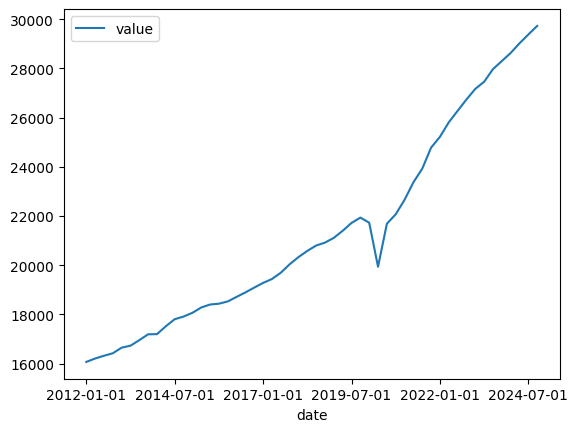

In [10]:
df.set_index('date')['2012':].plot()

## 2.3 OECD

In [11]:
import requests
import pandas as pd
import io
# The URL containing the data to be scraped
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PDB@DF_PDB_ULC_Q,1.0/.Q.......?startPeriod=2023-Q4&format=csv"
# Send a GET request to the URL
response = requests.get(url)
data = io.StringIO(response.text)
# Use pandas to read the CSV data
df = pd.read_csv(data)
df.head(2)

,DATAFLOW,REF_AREA,FREQ,MEASURE,ACTIVITY,UNIT_MEASURE,PRICE_BASE,TRANSFORMATION,ADJUSTMENT,CONVERSION_TYPE,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,BASE_PER,DECIMALS
0,OECD.SDD.TPS:DSD_PDB@DF_PDB_ULC_Q(1.0),SVN,Q,GDPEMP,_T,IX,Q,_Z,S,NC,2024-Q2,110.9560,A,0,2015.0,0
1,OECD.SDD.TPS:DSD_PDB@DF_PDB_ULC_Q(1.0),NZL,Q,GDPEMP,_T,IX,Q,_Z,S,NC,2024-Q2,103.2901,A,0,2015.0,0


In [12]:
cols = ['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE']
df_oecd = df[cols]
df_oecd.head(2)

,REF_AREA,TIME_PERIOD,OBS_VALUE,MEASURE
0,SVN,2024-Q2,110.9560,GDPEMP
1,NZL,2024-Q2,103.2901,GDPEMP


## 2.4 IMF

In [77]:
url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M.GB.PCPI_IX' # adjust codes here

# Navigate to series in API-returned JSON data
data = (requests.get(f'{url}{key}').json()
        ['CompactData']['DataSet']['Series'])

baseyr = data['@BASE_YEAR']  # Save the base year
# Create pandas dataframe from the observations
data_list = [[obs.get('@TIME_PERIOD'), obs.get('@OBS_VALUE')] for obs in data['Obs']]

df = pd.DataFrame(data_list, columns=['date', 'value'])
     
df = df.set_index(pd.to_datetime(df['date']))['value'].astype('float')

df.head(2)

date
1955-01-01    5.392469
1955-02-01    5.392469
Name: value, dtype: float64

In [80]:
import requests
import pandas as pd

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M..PCPI_IX.?startPeriod=2000&endPeriod=2001'

data = requests.get(f'{url}{key}').json()['CompactData']['DataSet']['Series']
#data

# M. Merging data, dates and index


### M.1. Download

In [13]:
import pandas as pd
import requests
import io

url = 'https://github.com/KMueller-Lab/Global-Macro-Database/raw/refs/heads/main/data/final/chainlinked_infl.dta'
df_macro = pd.read_stata(url)
df_macro.head(2)

,ISO3,year,ADB_infl,AHSTAT_infl,AMF_infl,BCEAO_infl,BIS_infl,BORDO_infl,CEPAC_infl,EUS_infl,...,OECD_KEI_infl,WB_CC_infl,WDI_infl,WDI_ARC_infl,CS1_infl,CS2_infl,infl,chainlinking_ratio,source,source_change
0,ZWE,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.131044,1.0,IMF_WEO,NaN
1,ZWE,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.108963,1.0,IMF_WEO,NaN


In [14]:
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PDB@DF_PDB_ULC_Q,1.0/.Q.......?startPeriod=1990-Q4&format=csv"
response = requests.get(url)
data = io.StringIO(response.text)
df_oecd = pd.read_csv(data)
df_oecd.head(2)

,DATAFLOW,REF_AREA,FREQ,MEASURE,ACTIVITY,UNIT_MEASURE,PRICE_BASE,TRANSFORMATION,ADJUSTMENT,CONVERSION_TYPE,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,BASE_PER,DECIMALS
0,OECD.SDD.TPS:DSD_PDB@DF_PDB_ULC_Q(1.0),DNK,Q,LCEMP,_T,PA,V,GY,S,NC,2017-Q3,1.793888,A,0,NaN,2
1,OECD.SDD.TPS:DSD_PDB@DF_PDB_ULC_Q(1.0),DNK,Q,LCEMP,_T,PA,V,GY,S,NC,2017-Q2,1.108080,A,0,NaN,2


## M.2 Filter rows 

In [15]:
df_macro_nz = df_macro.query("ISO3 == 'NZL'")[['ISO3', 'year', 'OECD_KEI_infl', 'BIS_infl']].dropna()
df_macro_nz.tail(2)

,ISO3,year,OECD_KEI_infl,BIS_infl
6331,NZL,1917.0,9.760275,9.759180
6332,NZL,1916.0,7.948244,7.949731


In [16]:
# cols = ['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE']
# df_oecd.query("REF_AREA == 'NZL' & MEASURE=='ULCE' & UNIT_MEASURE == 'PA'").sort_values("TIME_PERIOD")

In [17]:
cols = ['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE', 'UNIT_MEASURE']
df_oecd_nz = df_oecd[cols].query("REF_AREA == 'NZL' & MEASURE=='ULCE' & UNIT_MEASURE == 'PA'")
df_oecd_nz.head(2)

,REF_AREA,TIME_PERIOD,OBS_VALUE,MEASURE,UNIT_MEASURE
25640,NZL,2017-Q2,1.077198,ULCE,PA
25641,NZL,2017-Q1,5.819698,ULCE,PA


## M.3 Rename columns

In [18]:
df_macro_nz = df_macro_nz.rename({"ISO3":'country', "year":'date'}, axis=1)
df_macro_nz.head(2)

,country,date,OECD_KEI_infl,BIS_infl
6225,NZL,2023.0,5.733163,5.733163
6226,NZL,2022.0,7.172225,7.172225


In [19]:
df_oecd_nz = df_oecd_nz.rename({"REF_AREA":'country', "TIME_PERIOD":'date', 'OBS_VALUE':'ULCE'}, axis=1).drop(["MEASURE", "UNIT_MEASURE"], axis=1)
df_oecd_nz.head(2)

,country,date,ULCE
25640,NZL,2017-Q2,1.077198
25641,NZL,2017-Q1,5.819698


## M.4 Date

In [20]:
df_oecd_nz.date.dtype

dtype('O')

In [21]:
df_oecd_nz.date = pd.PeriodIndex(df_oecd_nz.date, freq='Q').to_timestamp()
df_oecd_nz.date.dtype

dtype('<M8[ns]')

In [22]:
df_macro_nz.date.dtype

dtype('float64')

In [23]:
df_macro_nz.head(2)

,country,date,OECD_KEI_infl,BIS_infl
6225,NZL,2023.0,5.733163,5.733163
6226,NZL,2022.0,7.172225,7.172225


In [24]:
df_macro_nz.date = pd.to_datetime(df_macro_nz.date, format = '%Y')
df_macro_nz.date.dtype

dtype('<M8[ns]')

## M.5 Set index

In [25]:
df_macro_nz = df_macro_nz.set_index(['country', 'date'])
df_macro_nz.head(2)

OECD_KEI_infl  BIS_infl
country date                               
NZL     2023-01-01       5.733163  5.733163
        2022-01-01       7.172225  7.172225

In [26]:
df_macro_nz.sort_index().tail(2)

OECD_KEI_infl  BIS_infl
country date                               
NZL     2022-01-01       7.172225  7.172225
        2023-01-01       5.733163  5.733163

In [27]:
df_oecd_nz = df_oecd_nz.set_index(['country', 'date'])
df_oecd_nz.head(2)

ULCE
country date                
NZL     2017-04-01  1.077198
        2017-01-01  5.819698

## M.M Merge

### M.M.1 Merge Function

In [28]:
df_merge = pd.merge(
    df_macro_nz,
    df_oecd_nz,
    right_index = True,
    left_index = True,
    how = 'inner'
    
)
df_merge.tail(2)

OECD_KEI_infl  BIS_infl     ULCE
country date                                        
NZL     1992-01-01       1.014557  1.014523 -0.38059
        1991-01-01       2.602399  2.602418  6.21877

### M.M.2 Concat

In [29]:
df_merge = pd.concat(
    [df_macro_nz,
    df_oecd_nz],
    axis = 1
)
df_merge.dropna().tail(2)

OECD_KEI_infl  BIS_infl     ULCE
country date                                        
NZL     1992-01-01       1.014557  1.014523 -0.38059
        1991-01-01       2.602399  2.602418  6.21877

# Shape Data

## S.1 Wide to long

In [30]:
df_long = df_merge.stack().reset_index()
df_long.head(2)

,country,date,level_2,0
0,NZL,2023-01-01,OECD_KEI_infl,5.733163
1,NZL,2023-01-01,BIS_infl,5.733163


## S.2 Long to wide

In [31]:
df_wide = df_long.pivot(
    index = 'date',
    columns = ['country', 'level_2'],
    values = 0
)
df_wide.head(2)

country              NZL               
level_2    OECD_KEI_infl  BIS_infl ULCE
date                                   
1916-01-01      7.948244  7.949731  NaN
1917-01-01      9.760275  9.759180  NaN

## Long to Panel

In [32]:
df_panel = df_long.pivot(
    index = ['country', 'date'],
    columns =  'level_2',
    values = 0
)
df_panel.head(2)

level_2             BIS_infl  OECD_KEI_infl  ULCE
country date                                     
NZL     1916-01-01  7.949731       7.948244   NaN
        1917-01-01  9.759180       9.760275   NaN

# 3. Webscraping

## 3.1 Basic HTML

### 3.1.1 Scrape

In [33]:
import requests
# The URL of the website to scrape
url = 'http://quotes.toscrape.com/'
# Send a GET request to the website
response = requests.get(url)
response

<Response [200]>

### 3.1.2 Read content

In [34]:
from bs4 import BeautifulSoup
# Parse the HTML content of the page using Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')
#soup

In [35]:
# Find all quote elements on the page
quotes = soup.find_all('div', class_='quote')
#quotes

In [36]:
quote = quotes[1]
quote

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. Rowling</small>
<a href="/author/J-K-Rowling">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="abilities,choices" itemprop="keywords"/>
<a class="tag" href="/tag/abilities/page/1/">abilities</a>
<a class="tag" href="/tag/choices/page/1/">choices</a>
</div>
</div>

In [37]:
quote.get_text()

'\n“It is our choices, Harry, that show what we truly are, far more than our abilities.”\nby J.K. Rowling\n(about)\n\n\n            Tags:\n            \nabilities\nchoices\n\n'

In [38]:
quote.find('span', class_='text').get_text()

'“It is our choices, Harry, that show what we truly are, far more than our abilities.”'

### 3.1.3 Print all

In [39]:

# Iterate through the quotes and extract the text
for quote in quotes[:2]:
    text = quote.find('span', class_='text').get_text()
    author = quote.find('small', class_='author').get_text()
    # Print the quote and the author
    print(f'"{text}" - {author}\n')

"“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - Albert Einstein

"“It is our choices, Harry, that show what we truly are, far more than our abilities.”" - J.K. Rowling



## 3.2 Scraping the FED

### 3.2.1 Scraping one statement

In [40]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_fomc_statement(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    statement = "\n\n".join(p.get_text(strip=True) for p in paragraphs)
    date_match = re.search(r'monetary(\d{8})a\.htm', url)
    date_str = date_match.group(1)
    date = pd.to_datetime(f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}")
    return pd.DataFrame({'FOMC_Statement': [statement], 'Link': [url]}, index=[date])

example_url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary20240131a.htm"
statement_df = get_fomc_statement(example_url)
statement_df.head(2)

,FOMC_Statement,Link
2024-01-31,"The Federal Reserve, the central bank of the U...",https://www.federalreserve.gov/newsevents/pres...


### 3.2.2 Scraping mulitple statements

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

def get_fomc_statement_links(calendar_url='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm'):
   
    response = requests.get(calendar_url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    links = [
        'https://www.federalreserve.gov' + a['href']
        for a in soup.select('a[href^="/newsevents/pressreleases/monetary"]')
    ]
    return links
    

def download_fomc_statement(url):

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    statement = "\n\n".join(p.get_text(strip=True) for p in paragraphs)
    date_match = re.search(r'monetary(\d{8})a\.htm', url)
    date_str = date_match.group(1) if date_match else None
    if date_str:
        date = pd.to_datetime(f"{date_str[:4]}-{date_str[4:6]}-{date_str[6:]}")
        return pd.DataFrame({'FOMC_Statement': [statement], 'Link': [url]}, index=[date])
    else:
        return pd.DataFrame({'FOMC_Statement': [statement], 'Link': [url]})

statement_links = get_fomc_statement_links()
len(statement_links)

96

In [42]:
df_statements = []
for statement in statement_links[:10]:
    statement_df = download_fomc_statement(statement)
    df_statements.append(statement_df)
df_statements = pd.concat(df_statements, axis=0)
df_statements.head(2)

,FOMC_Statement,Link
2025-01-29 00:00:00,"The Federal Reserve, the central bank of the U...",https://www.federalreserve.gov/newsevents/pres...
0,"The Federal Reserve, the central bank of the U...",https://www.federalreserve.gov/newsevents/pres...


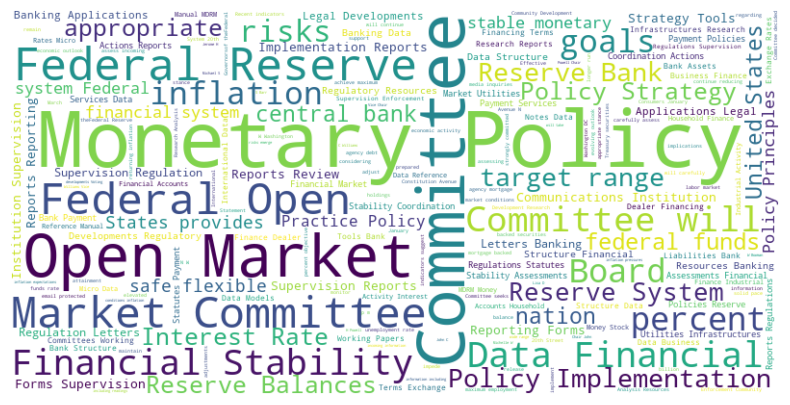

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all statements into one string
text = " ".join(df_statements['FOMC_Statement'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()